In [1]:
# Please don't change this cell, but do make sure to run it.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
answer_words = pd.read_csv('edited_data.csv')

In [2]:
def capitalize(variable):
    return variable.capitalize()

answer_words["Geography"] = answer_words["Geography"].apply(capitalize)

In [3]:
answer_words = answer_words.drop(columns = ["RowNumber", "Unnamed: 0"])


In [4]:
answer_words["CustomerId"].unique().shape[0]
answer_words = answer_words.set_index("CustomerId")

<AxesSubplot:ylabel='Frequency'>

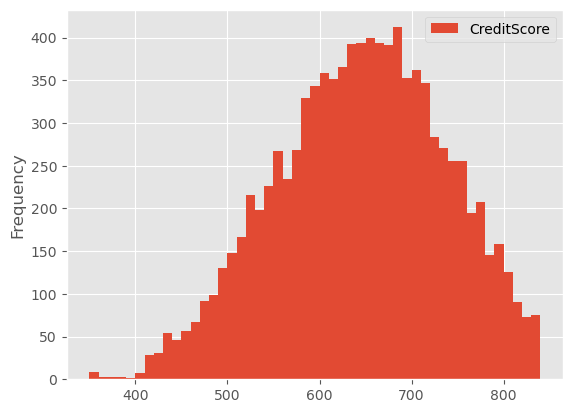

In [5]:
answer_words = answer_words[answer_words["CreditScore"] <= 850]
answer_words.plot(kind="hist", x="Age", y="CreditScore", bins=np.arange(350,850, 10))

In [6]:
zeroZ = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 0)].shape[0]
zeroO = answer_words[(answer_words["Exited"] == 0) & (answer_words["IsActiveMember"] == 1)].shape[0]
oneZ = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 0)].shape[0]
oneO = answer_words[(answer_words["Exited"] == 1) & (answer_words["IsActiveMember"] == 1)].shape[0]
a = zeroZ/(zeroZ+oneO+oneZ+zeroO)
b = zeroO/(zeroZ+oneO+oneZ+zeroO)
c = oneZ/(zeroZ+oneO+oneZ+zeroO)
d = oneO/(zeroZ+oneO+oneZ+zeroO)
print("Have not Exited and are not active " + str(a))
print("Have not Exited and are active " + str(b))
print("Have Exited and are not active " + str(c))
print("Have Exited and are active " + str(d))

Have not Exited and are not active 0.35490668272125225
Have not Exited and are active 0.4416014449127032
Have Exited and are not active 0.12984146096728877
Have Exited and are active 0.07365041139875576


In [7]:
answer_words

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1.0
15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0.0
15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0.0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.1,1,1,79084.10,0.0
15592531,Bartlett,822,France,Male,50,7,0.00,2.1,1,1,10062.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0,96270.64,0.0
15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1,101699.77,0.0
15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1,42085.58,1.0


In [8]:
answer_words["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
answer_words["Gender"].unique()

array(['Female', 'Male'], dtype=object)

<AxesSubplot:xlabel='CreditScore', ylabel='Balance'>

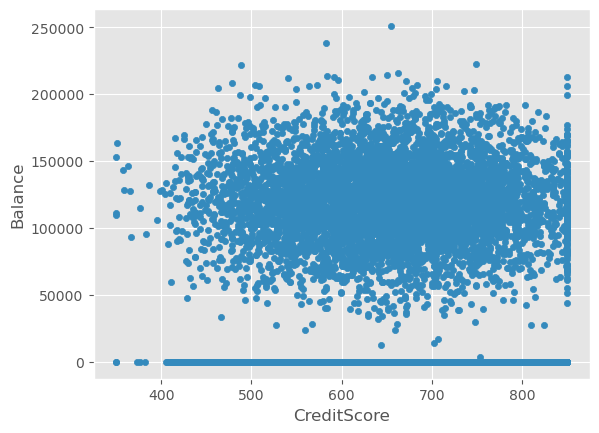

In [13]:
answer_words.plot(kind="scatter",x="CreditScore",y="Balance")

<AxesSubplot:title={'center':'Churn Proportion vs. Country'}, xlabel='Geography'>

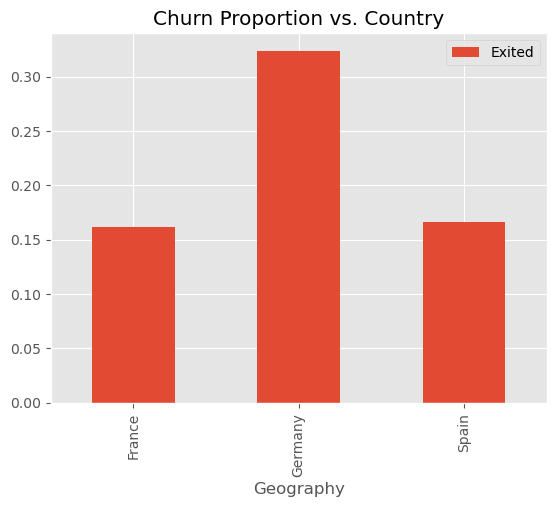

In [23]:
geo_churns = answer_words[['Geography', 'Exited']]
geo_churns = geo_churns.groupby("Geography").mean()
geo_churns.plot(kind="bar", title="Churn Proportion vs. Country")

<AxesSubplot:title={'center':'Churn Proportion vs. Gender'}, xlabel='Gender'>

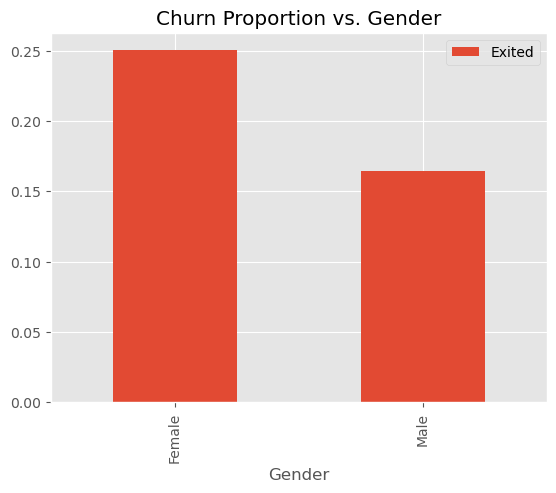

In [22]:
gender_churns = answer_words[['Gender', 'Exited']]
gender_churns = gender_churns.groupby("Gender").mean()
gender_churns.plot(kind="bar",title="Churn Proportion vs. Gender")

<AxesSubplot:title={'center':'Age Group vs. Churn Rate'}, xlabel='decade'>

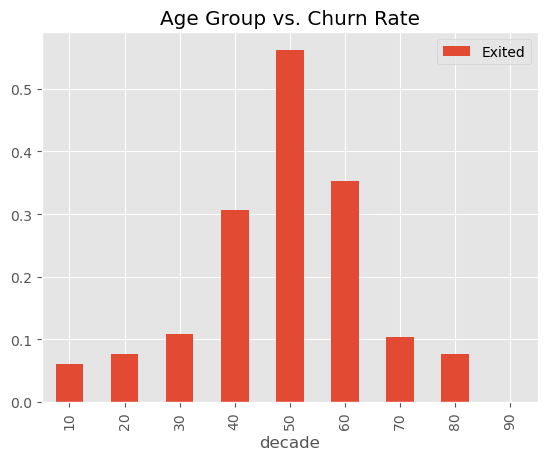

In [40]:
def age_group(val):
    return int(val/10)*10

age_churns = answer_words[['Age', 'Exited']]
age_churns = age_churns.assign(decade = age_churns.get("Age").apply(age_group))
age_churns = age_churns.groupby("decade").mean().drop(columns=["Age"])
age_churns.plot(kind="bar",title="Age Group vs. Churn Rate")

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Frequency'>

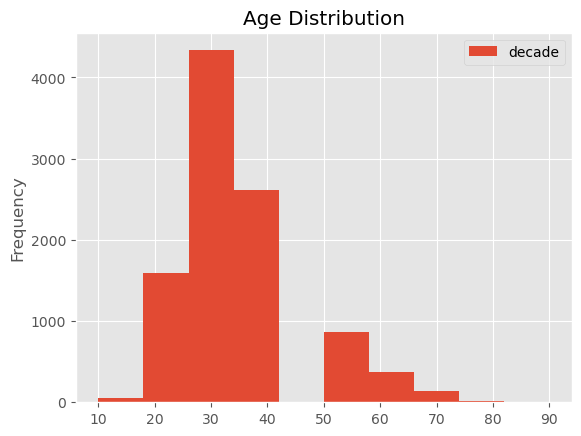

In [44]:
age_churns = answer_words[['Age']]
age_churns = age_churns.assign(decade = age_churns.get("Age").apply(age_group))
age_churns = age_churns.drop(columns=["Age"])
age_churns.plot(kind="hist",title="Age Distribution")